In [4]:
library("minfi")
library("IlluminaHumanMethylationEPICmanifest")
library("IlluminaHumanMethylationEPICanno.ilm10b2.hg19")
library("Biobase")
library("RColorBrewer")
library("limma")
library(reshape2)
library(ggplot2)
library(gplots)


ERROR: Error in library("minfi"): es gibt kein Paket namens ‘minfi’


In [5]:
R.home()

[1] "/Users/simonburgermeister/anaconda3/envs/renv/lib/R"

In [3]:
#baseDir <- getwd()
#outDir <- getwd()

targets_450k = read.csv("450K.csv", strip.white = TRUE, stringsAsFactors = FALSE)
RGSet_450k <- read.metharray.exp(targets=targets_450k, recursive=TRUE, force=TRUE)

In [8]:
targets_850k = read.csv("850K.csv", strip.white = TRUE, stringsAsFactors = FALSE)

In [9]:
#targets_850k = read.csv("850K.csv", strip.white = TRUE, stringsAsFactors = FALSE)
RGSet_850k <- read.metharray.exp(targets=targets_850k, recursive=TRUE, verbose=TRUE, force=TRUE)

[read.metharray] Reading GSM3537968_200930750005_R05C01_Grn.idat

[read.metharray] Reading GSM3537969_200928190088_R02C01_Grn.idat

[read.metharray] Reading GSM3537970_200772270034_R05C01_Grn.idat

[read.metharray] Reading GSM3537971_200992360024_R03C01_Grn.idat

[read.metharray] Reading GSM3537972_200992360034_R02C01_Grn.idat

[read.metharray] Reading GSM3537973_200992360034_R05C01_Grn.idat

[read.metharray] Reading 207335090074_R08C01_Grn.idat

[read.metharray] Reading GSM5707156_203550300038_R07C01_Grn.idat

[read.metharray] Reading GSM5707172_203774250115_R07C01_Grn.idat

[read.metharray] Reading GSM5707201_204667540074_R05C01_Grn.idat

[read.metharray] Reading GSM5707248_204503540053_R01C01_Grn.idat

[read.metharray] Reading GSM5707250_203249020122_R08C01_Grn.idat

[read.metharray] Reading GSM5707251_204592890057_R05C01_Grn.idat

[read.metharray] Reading GSM5707281_204294120054_R04C01_Grn.idat

[read.metharray] Reading GSM5707291_204384680078_R08C01_Grn.idat

[read.metharray] Read

[read.metharray] Reading GSM5707329_203960260001_R07C01_Red.idat

[read.metharray] Reading GSM5707333_204088040018_R07C01_Red.idat

[read.metharray] Reading GSM5707334_204316970051_R07C01_Red.idat

[read.metharray] Reading GSM5707336_204316970051_R05C01_Red.idat

[read.metharray] Reading GSM5707337_204316970051_R04C01_Red.idat

[read.metharray] Reading GSM5707338_204316970051_R03C01_Red.idat

[read.metharray] Reading GSM5707340_204316970051_R02C01_Red.idat

[read.metharray] Reading GSM5707342_204316970009_R08C01_Red.idat

[read.metharray] Reading GSM5707343_201532190164_R04C01_Red.idat

[read.metharray] Reading GSM5707344_201465930056_R04C01_Red.idat

[read.metharray] Reading GSM5707346_203960260029_R06C01_Red.idat

[read.metharray] Reading GSM5707347_203960260029_R01C01_Red.idat

[read.metharray] Reading GSM5707349_204088040018_R03C01_Red.idat

[read.metharray] Reading GSM5707351_203282450234_R04C01_Red.idat

[read.metharray] Reading GSM5707352_201465930053_R05C01_Red.idat

[read.meth

In [10]:
#targets_850k = read.csv("850K.csv", strip.white = TRUE, stringsAsFactors = FALSE)
#RGSet_850k <- read.metharray.exp(targets=targets_850k, recursive=TRUE, force=TRUE)
# Merge Datasets
RGSet <- combineArrays(RGSet_850k, RGSet_450k, outType="IlluminaHumanMethylation450k")

[convertArray] Casting as IlluminaHumanMethylation450k

Loading required package: IlluminaHumanMethylation450kmanifest



In [11]:
targets <- read.csv("all_probes_info.csv", strip.white = TRUE, stringsAsFactors = FALSE)
#targets <- read.csv("450K.csv", strip.white = TRUE, stringsAsFactors = FALSE)
rownames(targets) <- targets$geo_accession
targets <- targets[pData(RGSet)$geo_accession,]

In [12]:
targets

,X,geo_accession,organism_ch1,protocol,Basename,sample_origin,Sample_Group
,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
GSM3537968,55,GSM3537968,Homo sapiens,850K,/home/simon/Desktop/bioinfo/methylation/analysis1/data/GSM3537968_200930750005_R05C01,NYULMC,IDH Mutant Astrocytoma
GSM3537969,56,GSM3537969,Homo sapiens,850K,/home/simon/Desktop/bioinfo/methylation/analysis1/data/GSM3537969_200928190088_R02C01,NYULMC,IDH Mutant Astrocytoma
GSM3537970,57,GSM3537970,Homo sapiens,850K,/home/simon/Desktop/bioinfo/methylation/analysis1/data/GSM3537970_200772270034_R05C01,NYULMC,IDH Mutant Astrocytoma
GSM3537971,58,GSM3537971,Homo sapiens,850K,/home/simon/Desktop/bioinfo/methylation/analysis1/data/GSM3537971_200992360024_R03C01,NYULMC,IDH Mutant Astrocytoma
GSM3537972,59,GSM3537972,Homo sapiens,850K,/home/simon/Desktop/bioinfo/methylation/analysis1/data/GSM3537972_200992360034_R02C01,NYULMC,IDH Mutant Astrocytoma
GSM3537973,60,GSM3537973,Homo sapiens,850K,/home/simon/Desktop/bioinfo/methylation/analysis1/data/GSM3537973_200992360034_R05C01,NYULMC,IDH Mutant Astrocytoma
IDH p.Arg172Ala,61,IDH p.Arg172Ala,Homo sapiens,850K,/home/simon/Desktop/bioinfo/methylation/analysis1/data/207335090074_R08C01,CHUV,IDH p.Arg172Ala
GSM5707156,66,GSM5707156,Homo sapiens,850K,/home/simon/Desktop/bioinfo/methylation/analysis3/data/GSM5707156_203550300038_R07C01,"Neuropathology, UMG Gotingen",IDH Mutant SNUC
GSM5707172,67,GSM5707172,Homo sapiens,850K,/home/simon/Desktop/bioinfo/methylation/analysis3/data/GSM5707172_203774250115_R07C01,"Neuropathology, UKGM Giessen/Marburg",Squamous cell carcinoma


In [13]:
phenoData <- pData(RGSet)
manifest <- getManifest(RGSet)

In [14]:
manifest

IlluminaMethylationManifest object
Annotation
  array: IlluminaHumanMethylation450k
Number of type I probes: 135476 
Number of type II probes: 350036 
Number of control probes: 850 
Number of SNP type I probes: 25 
Number of SNP type II probes: 40 

In [15]:
outDir <- '/home/simon/Desktop/bioinfo/methylation/analysis3/results'

In [16]:
qcReportpdf = qcReport(RGSet,sampNames = targets$geo_accession,sampGroups=targets$Sample_Group,pdf="qcReport.pdf")
qcReportpdf

Mset.illumina <- preprocessIllumina(RGSet, bg.correct=TRUE, normalize="controls") ##After Norm
qc <- getQC(Mset.illumina)
png(file=paste(outDir,"/QC.png", sep=""),width=2048,height=2048,pointsize=50)
plotQC(qc)
dev.off()

Warning message in type.convert.default(X[[i]], ...):
“'as.is' should be specified by the caller; using TRUE”
Warning message in type.convert.default(X[[i]], ...):
“'as.is' should be specified by the caller; using TRUE”
Warning message in type.convert.default(X[[i]], ...):
“'as.is' should be specified by the caller; using TRUE”
Warning message in type.convert.default(X[[i]], ...):
“'as.is' should be specified by the caller; using TRUE”
Warning message in type.convert.default(X[[i]], ...):
“'as.is' should be specified by the caller; using TRUE”
Warning message in type.convert.default(X[[i]], ...):
“'as.is' should be specified by the caller; using TRUE”
Warning message in type.convert.default(X[[i]], ...):
“'as.is' should be specified by the caller; using TRUE”
Warning message in type.convert.default(X[[i]], ...):
“'as.is' should be specified by the caller; using TRUE”
Warning message in type.convert.default(X[[i]], ...):
“'as.is' should be specified by the caller; using TRUE”
Warning me

Warning message in type.convert.default(X[[i]], ...):
“'as.is' should be specified by the caller; using TRUE”
Warning message in type.convert.default(X[[i]], ...):
“'as.is' should be specified by the caller; using TRUE”
Warning message in type.convert.default(X[[i]], ...):
“'as.is' should be specified by the caller; using TRUE”
Warning message in type.convert.default(X[[i]], ...):
“'as.is' should be specified by the caller; using TRUE”
Warning message in type.convert.default(X[[i]], ...):
“'as.is' should be specified by the caller; using TRUE”
Warning message in type.convert.default(X[[i]], ...):
“'as.is' should be specified by the caller; using TRUE”
Warning message in type.convert.default(X[[i]], ...):
“'as.is' should be specified by the caller; using TRUE”
Warning message in type.convert.default(X[[i]], ...):
“'as.is' should be specified by the caller; using TRUE”
Warning message in type.convert.default(X[[i]], ...):
“'as.is' should be specified by the caller; using TRUE”
Warning me

Warning message in type.convert.default(X[[i]], ...):
“'as.is' should be specified by the caller; using TRUE”
Warning message in type.convert.default(X[[i]], ...):
“'as.is' should be specified by the caller; using TRUE”
Warning message in type.convert.default(X[[i]], ...):
“'as.is' should be specified by the caller; using TRUE”
Warning message in type.convert.default(X[[i]], ...):
“'as.is' should be specified by the caller; using TRUE”
Warning message in type.convert.default(X[[i]], ...):
“'as.is' should be specified by the caller; using TRUE”
Warning message in type.convert.default(X[[i]], ...):
“'as.is' should be specified by the caller; using TRUE”
Warning message in type.convert.default(X[[i]], ...):
“'as.is' should be specified by the caller; using TRUE”
Warning message in type.convert.default(X[[i]], ...):
“'as.is' should be specified by the caller; using TRUE”
Warning message in type.convert.default(X[[i]], ...):
“'as.is' should be specified by the caller; using TRUE”
Warning me

Warning message in type.convert.default(X[[i]], ...):
“'as.is' should be specified by the caller; using TRUE”
Warning message in type.convert.default(X[[i]], ...):
“'as.is' should be specified by the caller; using TRUE”
Warning message in type.convert.default(X[[i]], ...):
“'as.is' should be specified by the caller; using TRUE”
Warning message in type.convert.default(X[[i]], ...):
“'as.is' should be specified by the caller; using TRUE”
Warning message in type.convert.default(X[[i]], ...):
“'as.is' should be specified by the caller; using TRUE”
Warning message in type.convert.default(X[[i]], ...):
“'as.is' should be specified by the caller; using TRUE”
Warning message in type.convert.default(X[[i]], ...):
“'as.is' should be specified by the caller; using TRUE”
Warning message in type.convert.default(X[[i]], ...):
“'as.is' should be specified by the caller; using TRUE”
Warning message in type.convert.default(X[[i]], ...):
“'as.is' should be specified by the caller; using TRUE”
Warning me

png 
  2

Warning message:
“useNames = NA is deprecated. Instead, specify either useNames = TRUE or useNames = TRUE.”
Warning message:
“useNames = NA is deprecated. Instead, specify either useNames = TRUE or useNames = TRUE.”
Warning message:
“useNames = NA is deprecated. Instead, specify either useNames = TRUE or useNames = TRUE.”
Warning message:
“useNames = NA is deprecated. Instead, specify either useNames = TRUE or useNames = TRUE.”


png 
  2

In [17]:
###Removing poor quality samples###
detP <- detectionP(RGSet)
colnames(detP) <- RGSet$ID
#colnames(detP) <- RGSet$Sample_Group
detP

Warning message:
“useNames = NA is deprecated. Instead, specify either useNames = TRUE or useNames = TRUE.”
Warning message:
“useNames = NA is deprecated. Instead, specify either useNames = TRUE or useNames = TRUE.”
Warning message:
“useNames = NA is deprecated. Instead, specify either useNames = TRUE or useNames = TRUE.”
Warning message:
“useNames = NA is deprecated. Instead, specify either useNames = TRUE or useNames = TRUE.”


cg00212031,8.798153e-06,3.582325e-01,2.893154e-155,7.382143e-157,1.609914e-01,0.000000e+00,0.000000e+00,0.000000e+00,7.581096e-01,0.000000e+00,⋯,2.661403e-01,0.000000e+00,2.110835e-07,9.069519e-01,4.004747e-48,1.133365e-02,2.553997e-144,0.000000e+00,5.704412e-01,2.701650e-44
cg00213748,2.195716e-05,4.491693e-04,1.414964e-06,2.155608e-47,7.819990e-02,2.668256e-28,5.464955e-33,2.065748e-72,7.579520e-02,1.037617e-47,⋯,6.780135e-01,9.621059e-64,5.122291e-01,9.974423e-01,9.601773e-03,8.727523e-01,1.330001e-21,8.829588e-39,2.995372e-02,1.345016e-04
cg00214611,2.523605e-05,9.170197e-01,1.966804e-49,4.325025e-110,4.795723e-01,0.000000e+00,0.000000e+00,0.000000e+00,1.527741e-01,0.000000e+00,⋯,8.614108e-01,0.000000e+00,7.063012e-09,9.484513e-01,1.497108e-44,1.782136e-03,0.000000e+00,0.000000e+00,6.641484e-03,0.000000e+00
cg00455876,4.857150e-116,4.742547e-19,1.495641e-101,2.226366e-139,8.930523e-14,2.484331e-259,0.000000e+00,0.000000e+00,3.676511e-05,0.000000e+00,⋯,3.235149e-03,1.782685e-174,6.238690e-07,7.723951e-01,2.110452e-20,5.596902e-02,2.302104e-265,0.000000e+00,1.477736e-39,2.724041e-286
cg01707559,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,⋯,3.264776e-01,0.000000e+00,6.518333e-16,9.932023e-01,4.564735e-79,3.155045e-05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
cg02004872,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.308953e-161,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,⋯,1.505169e-01,0.000000e+00,0.000000e+00,3.539354e-01,0.000000e+00,1.697894e-114,0.000000e+00,0.000000e+00,5.480893e-129,0.000000e+00
cg02011394,0.000000e+00,1.686969e-03,0.000000e+00,0.000000e+00,3.838039e-08,0.000000e+00,0.000000e+00,0.000000e+00,1.380840e-01,0.000000e+00,⋯,7.255960e-01,0.000000e+00,4.262623e-64,9.754236e-01,0.000000e+00,3.318361e-32,0.000000e+00,0.000000e+00,3.442902e-02,0.000000e+00
cg02050847,0.000000e+00,4.399217e-08,0.000000e+00,0.000000e+00,2.856758e-08,0.000000e+00,0.000000e+00,0.000000e+00,1.263222e-02,0.000000e+00,⋯,1.558321e-01,0.000000e+00,0.000000e+00,9.908802e-01,0.000000e+00,5.129911e-114,0.000000e+00,0.000000e+00,2.377789e-02,0.000000e+00
cg02233190,6.304487e-117,2.460334e-06,0.000000e+00,0.000000e+00,7.245190e-08,0.000000e+00,0.000000e+00,0.000000e+00,1.184834e-02,0.000000e+00,⋯,2.156685e-01,0.000000e+00,0.000000e+00,8.614108e-01,0.000000e+00,2.693609e-131,0.000000e+00,0.000000e+00,2.972847e-27,0.000000e+00
cg02494853,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,⋯,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
cg02839557,1.406043e-29,2.421493e-03,0.000000e+00,8.835028e-154,1.153613e-10,0.000000e+00,0.000000e+00,0.000000e+00,2.021115e-01,0.000000e+00,⋯,1.385892e-01,0.000000e+00,8.154759e-31,9.691352e-01,2.899458e-100,2.269166e-07,0.000000e+00,0.000000e+00,8.127638e-32,0.000000e+00


In [18]:
#detectionP(RGSet)

In [19]:
# examine mean detection p-values across all samples to identify any failed samples
pal <- brewer.pal(8,"Dark2")
par(mfrow=c(1,2))
#png(file=paste(outDir,"/pvalue_sample_filter.png", sep=""),width=2048,height=2048,pointsize=70)
barplot(colMeans(detP), col=pal[factor(targets$Sample_Group)], las=2, 
        cex.names=1, cex.axis=1, names.arg=targets$geo_accession, ylab="Mean Detection p-values")
abline(h=0.05,col="red")
#legend("topleft", legend=levels(factor(targets$Sample_Group)), fill=pal,
#       bg="white")
dev.off()

null device 
          1

In [20]:
# remove poor quality samples
keep <- colMeans(detP) < 0.05
RGSet <- RGSet[,keep]
RGSet


class: RGChannelSet 
dim: 574981 149 
metadata(0):
assays(2): Green Red
rownames(574981): 29674443 30703409 ... 28673402 13742412
rowData names(0):
colnames(149): GSM3537968_200930750005_R05C01
  GSM3537969_200928190088_R02C01 ... GSM5707132_101231000003_R02C02
  GSM5707133_101231000003_R04C02
colData names(6): X geo_accession ... filenames ArrayTypes
Annotation
  array: IlluminaHumanMethylation450k
  annotation: ilmn12.hg19

In [21]:
# remove poor quality samples from targets data
targets <- targets[keep,]
detP <- detP[,keep]
dim(detP)

[1] 452453    149

In [22]:
mSetSq <- preprocessSWAN(RGSet)

Warning message:
“useNames = NA is deprecated. Instead, specify either useNames = TRUE or useNames = TRUE.”
Warning message:
“useNames = NA is deprecated. Instead, specify either useNames = TRUE or useNames = TRUE.”
Warning message:
“useNames = NA is deprecated. Instead, specify either useNames = TRUE or useNames = TRUE.”


In [23]:
# ensure probes are in the same order in the mSetSq and detP objects
detP <- detP[match(featureNames(mSetSq),rownames(detP)),] 

# remove any probes that have failed in one or more samples
keep <- rowSums(detP < 0.01) == ncol(mSetSq) 
table(keep)
gset.funnorm <- mSetSq[keep,]
dim(gset.funnorm)
detP

keep
 FALSE   TRUE 
 63046 389407 

[1] 389407    149

cg00212031,8.798153e-06,3.582325e-01,2.893154e-155,7.382143e-157,1.609914e-01,0.000000e+00,0.000000e+00,0.000000e+00,7.581096e-01,0.000000e+00,⋯,2.661403e-01,0.000000e+00,2.110835e-07,9.069519e-01,4.004747e-48,1.133365e-02,2.553997e-144,0.000000e+00,5.704412e-01,2.701650e-44
cg00213748,2.195716e-05,4.491693e-04,1.414964e-06,2.155608e-47,7.819990e-02,2.668256e-28,5.464955e-33,2.065748e-72,7.579520e-02,1.037617e-47,⋯,6.780135e-01,9.621059e-64,5.122291e-01,9.974423e-01,9.601773e-03,8.727523e-01,1.330001e-21,8.829588e-39,2.995372e-02,1.345016e-04
cg00214611,2.523605e-05,9.170197e-01,1.966804e-49,4.325025e-110,4.795723e-01,0.000000e+00,0.000000e+00,0.000000e+00,1.527741e-01,0.000000e+00,⋯,8.614108e-01,0.000000e+00,7.063012e-09,9.484513e-01,1.497108e-44,1.782136e-03,0.000000e+00,0.000000e+00,6.641484e-03,0.000000e+00
cg00455876,4.857150e-116,4.742547e-19,1.495641e-101,2.226366e-139,8.930523e-14,2.484331e-259,0.000000e+00,0.000000e+00,3.676511e-05,0.000000e+00,⋯,3.235149e-03,1.782685e-174,6.238690e-07,7.723951e-01,2.110452e-20,5.596902e-02,2.302104e-265,0.000000e+00,1.477736e-39,2.724041e-286
cg01707559,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,⋯,3.264776e-01,0.000000e+00,6.518333e-16,9.932023e-01,4.564735e-79,3.155045e-05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
cg02004872,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.308953e-161,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,⋯,1.505169e-01,0.000000e+00,0.000000e+00,3.539354e-01,0.000000e+00,1.697894e-114,0.000000e+00,0.000000e+00,5.480893e-129,0.000000e+00
cg02011394,0.000000e+00,1.686969e-03,0.000000e+00,0.000000e+00,3.838039e-08,0.000000e+00,0.000000e+00,0.000000e+00,1.380840e-01,0.000000e+00,⋯,7.255960e-01,0.000000e+00,4.262623e-64,9.754236e-01,0.000000e+00,3.318361e-32,0.000000e+00,0.000000e+00,3.442902e-02,0.000000e+00
cg02050847,0.000000e+00,4.399217e-08,0.000000e+00,0.000000e+00,2.856758e-08,0.000000e+00,0.000000e+00,0.000000e+00,1.263222e-02,0.000000e+00,⋯,1.558321e-01,0.000000e+00,0.000000e+00,9.908802e-01,0.000000e+00,5.129911e-114,0.000000e+00,0.000000e+00,2.377789e-02,0.000000e+00
cg02233190,6.304487e-117,2.460334e-06,0.000000e+00,0.000000e+00,7.245190e-08,0.000000e+00,0.000000e+00,0.000000e+00,1.184834e-02,0.000000e+00,⋯,2.156685e-01,0.000000e+00,0.000000e+00,8.614108e-01,0.000000e+00,2.693609e-131,0.000000e+00,0.000000e+00,2.972847e-27,0.000000e+00
cg02494853,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,⋯,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
cg02839557,1.406043e-29,2.421493e-03,0.000000e+00,8.835028e-154,1.153613e-10,0.000000e+00,0.000000e+00,0.000000e+00,2.021115e-01,0.000000e+00,⋯,1.385892e-01,0.000000e+00,8.154759e-31,9.691352e-01,2.899458e-100,2.269166e-07,0.000000e+00,0.000000e+00,8.127638e-32,0.000000e+00


In [24]:
gset.funnorm <- mapToGenome(gset.funnorm)

Loading required package: IlluminaHumanMethylation450kanno.ilmn12.hg19


Attaching package: ‘IlluminaHumanMethylation450kanno.ilmn12.hg19’


The following objects are masked from ‘package:IlluminaHumanMethylationEPICanno.ilm10b2.hg19’:

    Islands.UCSC, Locations, Manifest, Other, SNPs.132CommonSingle,
    SNPs.135CommonSingle, SNPs.137CommonSingle, SNPs.138CommonSingle,
    SNPs.141CommonSingle, SNPs.142CommonSingle, SNPs.144CommonSingle,
    SNPs.146CommonSingle, SNPs.147CommonSingle, SNPs.Illumina




In [25]:
gset.funnorm <- addSnpInfo(gset.funnorm)

In [26]:
gset.funnorm <- dropLociWithSnps(gset.funnorm,snps=c("SBE", "CpG"), maf=0) ##drop the loci which has snps

In [27]:

###Get annotation###
annot = getAnnotation(gset.funnorm)

###Remove sex probes###
sex_probes = annot$Name[annot$chr %in% c("chrX", "chrY")]
gset.funnorm = gset.funnorm[!(rownames(gset.funnorm) %in% sex_probes),]
#colnames(gset.funnorm) <- gset.funnorm$geo_accession
dim(gset.funnorm)

###Get beta values to obtain the data matrix###
#gset.funnorm.beta <- getBeta(gset.funnorm)
#colnames(gset.funnorm.beta) <- gset.funnorm$Sample_Group

###Get M values to obtain the data matrix###
gset.funnorm.M <- getM(gset.funnorm)
colnames(gset.funnorm.M) <- gset.funnorm$geo_accession


[1] 370462    149

null device 
          1

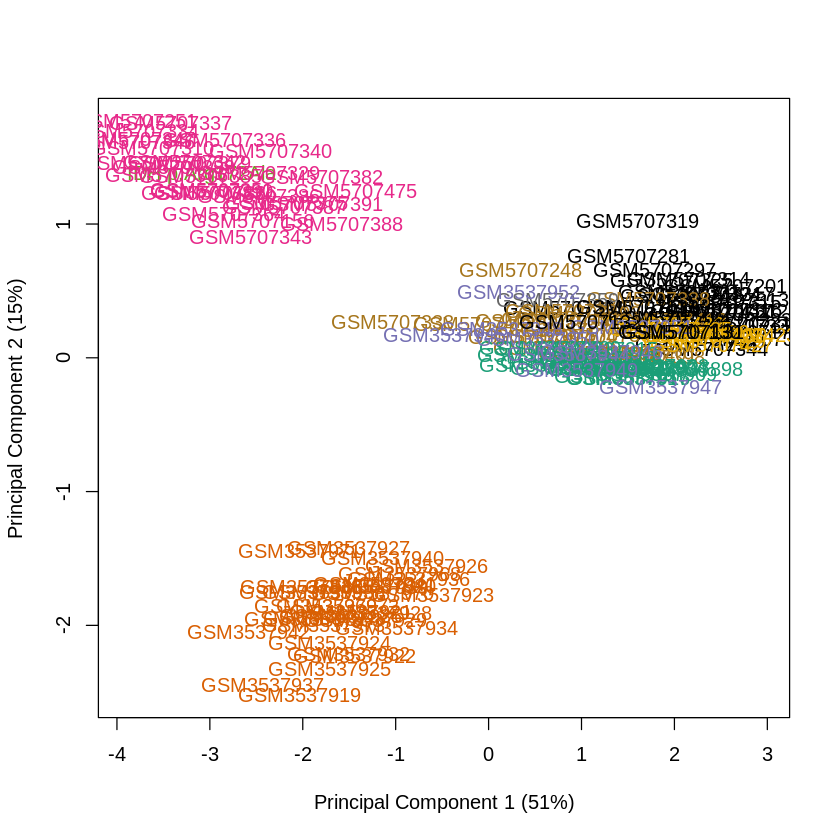

In [28]:
#MDSplots
pal <- brewer.pal(8,"Dark2")
#png(file=paste(outDir,"/MDSplotWithSampleNames-bypatients.png", sep=""),width=2048,height=2048,pointsize=60)
plotMDS(gset.funnorm.M, top=1000, labels = targets$Sample_Name, gene.selection="common",col=pal[factor(targets$Sample_Group)])
#legend("topleft", legend=levels(factor(targets$Sample_Group)), text.col=pal,bg="white", cex=1.2)
dev.off()

In [29]:
class(gset.funnorm)

[1] "GenomicMethylSet"
attr(,"package")
[1] "minfi"

In [30]:
pal <- brewer.pal(8,"Dark2")
png(file=paste(outDir,"/MDSplotTop1000.png", sep=""),width=2048,height=2048,pointsize=50)
plotMDS(gset.funnorm.M, top=1000, gene.selection="common",col=pal[factor(targets$Sample_Group)],pch=16)
legend("topleft", legend=levels(factor(targets$Sample_Group)), text.col=pal,bg="white", cex=0.8)
dev.off()


png 
  2

In [31]:
write.csv(gset.funnorm.M,file="results/M_values5.csv") ##write to a csv the beta value datamatrix

In [32]:
###Differential Methylation ###
condition <- pData(gset.funnorm)$Sample_Group #provide the sample groups for diff.methylation (if all groups)
dmp <- dmpFinder(gset.funnorm.M, pheno=condition, type="categorical") #run dmp on the data
dmp <- cbind(dmp, ID=rownames(dmp))
write.csv(dmp,file="results/differential_methylation5.csv")


Warning message:
“useNames = NA is deprecated. Instead, specify either useNames = TRUE or useNames = TRUE.”
Warning message:
“useNames = NA is deprecated. Instead, specify either useNames = TRUE or useNames = TRUE.”
Warning message:
“The spline based estimation of pi0 results in a non-positive value of pi0.
Therefore, pi0 is estimated by using lambda = 0.5.”


In [33]:
#annotation <- getAnnotation(RGSet) #get the probe annotation for reference
dmp_annot_combined <- cbind(annot[row.names(dmp),],dmp) #combine the dmp pvalue data with the annotation.
annot<-write.csv(dmp_annot_combined,file="results/differential_methylation_withAnnotation5.csv")

In [34]:
###Plot the heatmap###
cell_colors = colorRampPalette( c("#010F57", "#010F57", "#FAFAFA", "#B21212", "#B21212") )(300)
f <- factor(targets$Sample_Group)
png(file=paste(outDir,"/Heatmap(Top 5000) - IDH Mut, legend bottomright.png", sep=""),width=2050,height=2048,pointsize=50)
heatmap.2(gset.funnorm.M[row.names(dmp[1:5000,]),],trace = 'none',key.title="Methylation", labRow=FALSE, labCol=FALSE, cexCol = 1.2, scale = 'column',col = cell_colors,cexRow = 0.52,key.xlab = "Z-Score",main = "Heatmap (Top 5000)",ColSideColors = pal[factor(targets$Sample_Group)])
legend("bottomright", legend=levels(f), col=pal[factor(levels(f))], pch=15,cex = 0.5)
dev.off()
png(file=paste(outDir,"/Heatmap(Top 10000) - IDH Mut, legend topleft.png", sep=""),width=2050,height=2048,pointsize=50)
heatmap.2(gset.funnorm.M[row.names(dmp[1:10000,]),],trace = 'none',key.title="Methylation", labRow = FALSE, labCol=FALSE, cexCol = 1.2, scale = 'column',col = cell_colors,cexRow = 0.52,key.xlab = "Z-Score",main = "Heatmap (Top 10000)",ColSideColors = pal[factor(targets$Sample_Group)])
legend("topleft", legend=levels(f), col=pal[factor(levels(f))], pch=15,cex = 0.5)
dev.off()

png 
  2

png 
  2

In [35]:
###get methylated and unmethylated signal intensities###
#setwd("C:\\")
MSet <- preprocessRaw(RGSet)
MSet
meth_intensities <- getMeth(MSet)
write.csv(meth_intensities, file="results/meth_intensities5.csv")
unmeth_intensities <- getUnmeth(MSet)
write.csv(unmeth_intensities, file="results/unmeth_intensities5.csv")

class: MethylSet 
dim: 452453 149 
metadata(0):
assays(2): Meth Unmeth
rownames(452453): cg00212031 cg00213748 ... ch.22.47579720R
  ch.22.48274842R
rowData names(0):
colnames(149): GSM3537968_200930750005_R05C01
  GSM3537969_200928190088_R02C01 ... GSM5707132_101231000003_R02C02
  GSM5707133_101231000003_R04C02
colData names(6): X geo_accession ... filenames ArrayTypes
Annotation
  array: IlluminaHumanMethylation450k
  annotation: ilmn12.hg19
Preprocessing
  Method: Raw (no normalization or bg correction)
  minfi version: 1.44.0
  Manifest version: 0.4.0

In [36]:

###get the mean detection p values per sample, per probe###
#setwd("C:\\")
write.csv(detP, file="results/mean_detection_pvalues5.csv")

#### Rest analysis:
<br>
from: https://nbis-workshop-epigenomics.readthedocs.io/en/latest/content/tutorials/methylationArray/Array_Tutorial.html#preprocessquantile
<br>

In [25]:
mSetSqFlt <- mSetSq[keep,]
mSetSqFlt

class: MethylSet 
dim: 382153 95 
metadata(0):
assays(2): Meth Unmeth
rownames(382153): cg02494853 cg03706273 ... ch.22.47579720R
  ch.22.48274842R
rowData names(0):
colnames(95): GSM3537968_200930750005_R05C01
  GSM3537969_200928190088_R02C01 ... GSM3537966_200723300047_R02C02
  GSM3537967_201031670045_R01C02
colData names(6): X ID ... filenames ArrayTypes
Annotation
  array: IlluminaHumanMethylation450k
  annotation: ilmn12.hg19
Preprocessing
  Method: SWAN (based on a MethylSet preprocesses as 'Raw (no normalization or bg correction)'
  minfi version: 1.44.0
  Manifest version: 0.4.0

In [27]:
mSetSqFlt <- mapToGenome(mSetSqFlt)
mSetSqFlt <- addSnpInfo(mSetSqFlt)

Because the presence of short nucleotide polymorphisms (or SNPs) inside the probe body or at the nucleotide extension can have important consequences on the downstream analysis, minfi offers the possibility to remove such probes.

In [28]:
mSetSqFlt <- dropLociWithSnps(mSetSqFlt)
mSetSqFlt


class: GenomicMethylSet 
dim: 370103 95 
metadata(0):
assays(2): Meth Unmeth
rownames(370103): cg13869341 cg14008030 ... cg09300505 cg05939513
rowData names(6): Probe_rs Probe_maf ... SBE_rs SBE_maf
colnames(95): GSM3537968_200930750005_R05C01
  GSM3537969_200928190088_R02C01 ... GSM3537966_200723300047_R02C02
  GSM3537967_201031670045_R01C02
colData names(6): X ID ... filenames ArrayTypes
Annotation
  array: IlluminaHumanMethylation450k
  annotation: ilmn12.hg19
Preprocessing
  Method: SWAN (based on a MethylSet preprocesses as 'Raw (no normalization or bg correction)'
  minfi version: 1.44.0
  Manifest version: 0.4.0

null device 
          1

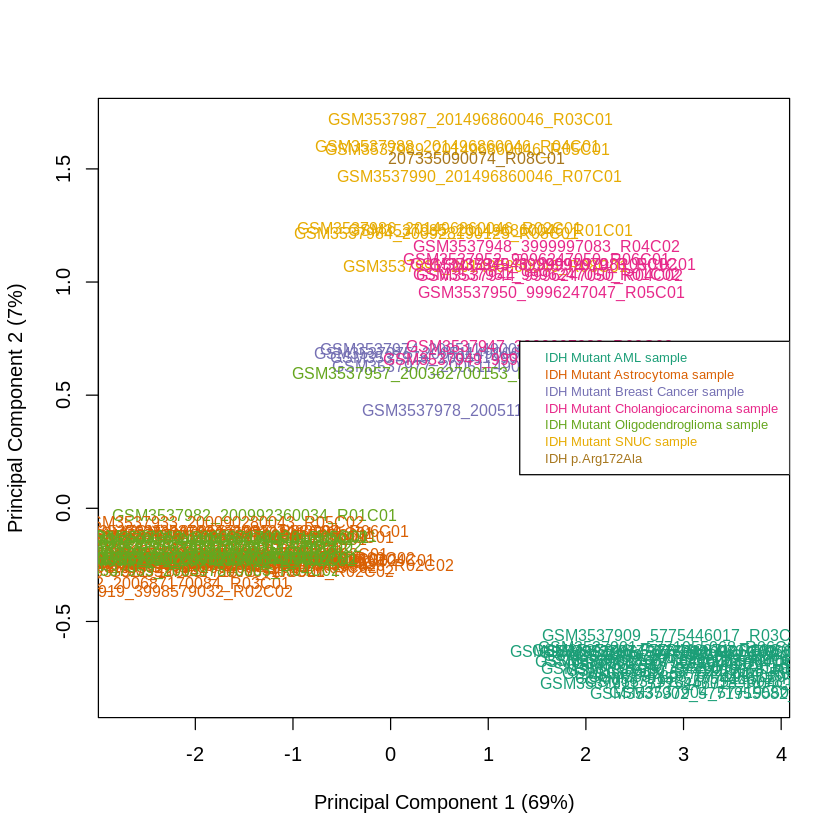

In [33]:
par(mfrow=c(1, 1))
plotMDS(getM(mSetSqFlt), top=5000, gene.selection="common",
        col=pal[factor(targets$Sample_Group)], cex=0.8)
legend("right", legend=levels(factor(targets$Sample_Group)), text.col=pal,
       cex=0.65, bg="white")

#plotMDS(getM(mSetSqFlt), top=1000, gene.selection="common",
#        col=pal[factor(targets$Sample_Source)])
#legend("right", legend=levels(factor(targets$Sample_Source)), text.col=pal,
#       cex=0.7, bg="white")
# Close double plotting window
dev.off()

In [43]:
colnames(gset.funnorm)

[1] "GSM3537968_200930750005_R05C01" "GSM3537969_200928190088_R02C01"
 [3] "GSM3537970_200772270034_R05C01" "GSM3537971_200992360024_R03C01"
 [5] "GSM3537972_200992360034_R02C01" "GSM3537973_200992360034_R05C01"
 [7] "GSM3537974_200511490093_R03C01" "GSM3537975_200511490093_R04C01"
 [9] "GSM3537976_200511490093_R05C01" "GSM3537977_200511490093_R06C01"
[11] "GSM3537978_200511490093_R07C01" "GSM3537979_200772270034_R02C01"
[13] "GSM3537980_200992360003_R01C01" "GSM3537981_200992360024_R06C01"
[15] "GSM3537982_200992360034_R01C01" "GSM3537983_200992360034_R06C01"
[17] "GSM3537984_200928190125_R08C01" "GSM3537985_201496860046_R01C01"
[19] "GSM3537986_201496860046_R02C01" "GSM3537987_201496860046_R03C01"
[21] "GSM3537988_201496860046_R04C01" "GSM3537989_201496860046_R05C01"
[23] "GSM3537990_201496860046_R07C01" "GSM3537991_201496860046_R08C01"
[25] "207335090074_R08C01"            "GSM3537898_5771955030_R01C02"  
[27] "GSM3537899_5771955046_R06C01"   "GSM3537900_5771955068_R05C01"  
[29] "GSM3537901_5771955068_R06C01"   "GSM3537902_5771955082_R02C02"  
[31] "GSM3537903_5771955084_R05C01"   "GSM3537904_5771955084_R03C02"  
[33] "GSM3537905_5775041007_R04C02"   "GSM3537906_5775041007_R03C02"  
[35] "GSM3537907_5775446014_R02C02"   "GSM3537908_5775446014_R04C01"  
[37] "GSM3537909_5775446017_R03C01"   "GSM3537910_5775446018_R01C02"  
[39] "GSM3537911_5775446018_R04C02"   "GSM3537912_5775446018_R06C02"  
[41] "GSM3537913_5775446062_R01C02"   "GSM3537914_5775446070_R06C01"  
[43] "GSM3537915_5775446071_R05C02"   "GSM3537916_5775446071_R03C01"  
[45] "GSM3537917_5775446071_R01C02"   "GSM3537918_5775446078_R03C01"  
[47] "GSM3537919_3998579032_R02C02"   "GSM3537920_9993943111_R05C02"  
[49] "GSM3537921_9994014020_R02C02"   "GSM3537922_10005771078_R03C01" 
[51] "GSM3537923_10005771085_R03C02"  "GSM3537924_10005771086_R05C01" 
[53] "GSM3537925_10005771097_R03C02"  "GSM3537926_101274800026_R02C02"
[55] "GSM3537927_101274800040_R02C01" "GSM3537928_101274800040_R05C01"
[57] "GSM3537929_200053730140_R01C02" "GSM3537930_200053730140_R05C02"
[59] "GSM3537931_200053730150_R04C01" "GSM3537932_200053730191_R01C01"
[61] "GSM3537933_200090280043_R05C02" "GSM3537934_200123480094_R06C01"
[63] "GSM3537935_200123480094_R06C02" "GSM3537936_200325530004_R04C01"
[65] "GSM3537937_200325530004_R06C02" "GSM3537938_200360420010_R05C01"
[67] "GSM3537939_200360420010_R05C02" "GSM3537940_200360420069_R03C01"
[69] "GSM3537941_200687170026_R02C02" "GSM3537942_200687170084_R03C01"
[71] "GSM3537943_201031670096_R02C01" "GSM3537944_9996247050_R04C02"  
[73] "GSM3537945_3999997079_R05C02"   "GSM3537946_3999997083_R01C01"  
[75] "GSM3537947_3999997083_R02C02"   "GSM3537948_3999997083_R04C02"  
[77] "GSM3537949_9996247047_R04C02"   "GSM3537950_9996247047_R05C01"  
[79] "GSM3537951_9996247050_R01C02"   "GSM3537952_9996247050_R06C01"  
[81] "GSM3537953_101274800040_R05C02" "GSM3537954_200090280027_R01C01"
[83] "GSM3537955_200090280112_R03C02" "GSM3537956_200362700153_R03C01"
[85] "GSM3537957_200362700153_R04C01" "GSM3537958_200397870003_R05C01"
[87] "GSM3537959_200397870003_R04C02" "GSM3537960_200397870003_R05C02"
[89] "GSM3537961_200397870003_R06C02" "GSM3537962_200687170026_R05C01"
[91] "GSM3537963_200687170048_R05C01" "GSM3537964_200687170083_R05C02"
[93] "GSM3537965_200723300047_R03C01" "GSM3537966_200723300047_R02C02"
[95] "GSM3537967_201031670045_R01C02"

In [50]:
targets

,X,title,geo_accession,status,submission_date,last_update_date,type,channel_count,source_name_ch1,organism_ch1,⋯,contact_zip.postal_code,contact_country,supplementary_file,series_id,data_row_count,ID,Name,Basename,protocol,Sample_Group
,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<chr>,<chr>,⋯,<int>,<chr>,<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>
/home/simon/Desktop/bioinfo/methylation/analysis1/data/GSM3537968_200930750005_R05C01,70,Methylation data from Astrocytoma tissue 26,GSM3537968,Public on Jan 15 2020,Jan 03 2019,Jan 16 2020,genomic,1,IDH Mutant Astrocytoma sample,Homo sapiens,⋯,10016,USA,"ftp://ftp.ncbi.nlm.nih.gov/geo/samples/GSM3537nnn/GSM3537968/suppl/GSM3537968_200930750005_R05C01_Grn.idat.gz,ftp://ftp.ncbi.nlm.nih.gov/geo/samples/GSM3537nnn/GSM3537968/suppl/GSM3537968_200930750005_R05C01_Red.idat.gz",GSE124617,363700,GSM3537968,GSM3537968_200930750005_R05C01,/home/simon/Desktop/bioinfo/methylation/analysis1/data/GSM3537968_200930750005_R05C01,850K,IDH Mutant Astrocytoma sample
/home/simon/Desktop/bioinfo/methylation/analysis1/data/GSM3537969_200928190088_R02C01,71,Methylation data from Astrocytoma tissue 27,GSM3537969,Public on Jan 15 2020,Jan 03 2019,Jan 16 2020,genomic,1,IDH Mutant Astrocytoma sample,Homo sapiens,⋯,10016,USA,"ftp://ftp.ncbi.nlm.nih.gov/geo/samples/GSM3537nnn/GSM3537969/suppl/GSM3537969_200928190088_R02C01_Grn.idat.gz,ftp://ftp.ncbi.nlm.nih.gov/geo/samples/GSM3537nnn/GSM3537969/suppl/GSM3537969_200928190088_R02C01_Red.idat.gz",GSE124617,363700,GSM3537969,GSM3537969_200928190088_R02C01,/home/simon/Desktop/bioinfo/methylation/analysis1/data/GSM3537969_200928190088_R02C01,850K,IDH Mutant Astrocytoma sample
/home/simon/Desktop/bioinfo/methylation/analysis1/data/GSM3537970_200772270034_R05C01,72,Methylation data from Astrocytoma tissue 28,GSM3537970,Public on Jan 15 2020,Jan 03 2019,Jan 16 2020,genomic,1,IDH Mutant Astrocytoma sample,Homo sapiens,⋯,10016,USA,"ftp://ftp.ncbi.nlm.nih.gov/geo/samples/GSM3537nnn/GSM3537970/suppl/GSM3537970_200772270034_R05C01_Grn.idat.gz,ftp://ftp.ncbi.nlm.nih.gov/geo/samples/GSM3537nnn/GSM3537970/suppl/GSM3537970_200772270034_R05C01_Red.idat.gz",GSE124617,363700,GSM3537970,GSM3537970_200772270034_R05C01,/home/simon/Desktop/bioinfo/methylation/analysis1/data/GSM3537970_200772270034_R05C01,850K,IDH Mutant Astrocytoma sample
/home/simon/Desktop/bioinfo/methylation/analysis1/data/GSM3537971_200992360024_R03C01,73,Methylation data from Astrocytoma tissue 29,GSM3537971,Public on Jan 15 2020,Jan 03 2019,Jan 16 2020,genomic,1,IDH Mutant Astrocytoma sample,Homo sapiens,⋯,10016,USA,"ftp://ftp.ncbi.nlm.nih.gov/geo/samples/GSM3537nnn/GSM3537971/suppl/GSM3537971_200992360024_R03C01_Grn.idat.gz,ftp://ftp.ncbi.nlm.nih.gov/geo/samples/GSM3537nnn/GSM3537971/suppl/GSM3537971_200992360024_R03C01_Red.idat.gz",GSE124617,363700,GSM3537971,GSM3537971_200992360024_R03C01,/home/simon/Desktop/bioinfo/methylation/analysis1/data/GSM3537971_200992360024_R03C01,850K,IDH Mutant Astrocytoma sample
/home/simon/Desktop/bioinfo/methylation/analysis1/data/GSM3537972_200992360034_R02C01,74,Methylation data from Astrocytoma tissue 30,GSM3537972,Public on Jan 15 2020,Jan 03 2019,Jan 16 2020,genomic,1,IDH Mutant Astrocytoma sample,Homo sapiens,⋯,10016,USA,"ftp://ftp.ncbi.nlm.nih.gov/geo/samples/GSM3537nnn/GSM3537972/suppl/GSM3537972_200992360034_R02C01_Grn.idat.gz,ftp://ftp.ncbi.nlm.nih.gov/geo/samples/GSM3537nnn/GSM3537972/suppl/GSM3537972_200992360034_R02C01_Red.idat.gz",GSE124617,363700,GSM3537972,GSM3537972_200992360034_R02C01,/home/simon/Desktop/bioinfo/methylation/analysis1/data/GSM3537972_200992360034_R02C01,850K,IDH Mutant Astrocytoma sample
/home/simon/Desktop/bioinfo/methylation/analysis1/data/GSM3537973_200992360034_R05C01,75,Methylation data from Astrocytoma tissue 31,GSM3537973,Public on Jan 15 2020,Jan 03 2019,Jan 16 2020,genomic,1,IDH Mutant Astrocytoma sample,Homo sapiens,⋯,10016,USA,"ftp://ftp.ncbi.nlm.nih.gov/geo/samples/GSM3537nnn/GSM3537973/suppl/GSM3537973_200992360034_R05C01_Gr

In [57]:
beta <- getBeta(gset.funnorm)
age <- pData(gset.funnorm)$Sample_Group
dmp <- dmpFinder(beta, pheno = age , type = "categorical")
head(dmp)

Warning message:
“useNames = NA is deprecated. Instead, specify either useNames = TRUE or useNames = TRUE.”
Warning message:
“useNames = NA is deprecated. Instead, specify either useNames = TRUE or useNames = TRUE.”


,intercept,f,pval,qval
,<dbl>,<dbl>,<dbl>,<dbl>
cg23586595,0.08653590,1324.1717,5.599262e-84,9.737204e-81
cg01903374,0.09890967,1039.7915,2.033935e-79,1.768522e-76
cg16509569,0.07222163,1017.6625,5.168575e-79,2.996077e-76
cg03875496,0.12024267,954.1265,8.441180e-78,3.669836e-75
cg00015530,0.14581259,931.9313,2.338723e-77,8.134150e-75
cg19252956,0.13874551,906.7925,7.637503e-77,2.213623e-74


In [59]:
pheno <- pData(gset.funnorm)$Sample_Group
designMatrix <- model.matrix(~ pheno)

In [61]:
dmrs <- bumphunter(gset.funnorm, design = designMatrix,cutoff = 0.2, B=0, type="Beta")

ERROR: Error in (function (classes, fdef, mtable) : unable to find an inherited method for function ‘bumphunter’ for signature ‘"GenomicMethylSet"’


In [58]:
# fit the contrasts
fit2 <- contrasts.fit(fit, contMatrix)
# Rank genes
fit2 <- eBayes(fit2)

ERROR: Error in contrasts.fit(fit, contMatrix): object 'contMatrix' not found


## Probe wise differential methylation:
<br>
<br>
After all this preprocessing and filtering, the time has come to address the actual biological question of interest! Namely, which CpG sites are differentially differentially methylated between the different cell types? To do this, we will design a linear model in limma.
<br>
<br>

In [35]:
targets

,X,title,geo_accession,status,submission_date,last_update_date,type,channel_count,source_name_ch1,organism_ch1,⋯,contact_zip.postal_code,contact_country,supplementary_file,series_id,data_row_count,ID,Name,Basename,protocol,Sample_Group
,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<chr>,<chr>,⋯,<int>,<chr>,<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>
/home/simon/Desktop/bioinfo/methylation/analysis1/data/GSM3537968_200930750005_R05C01,70,Methylation data from Astrocytoma tissue 26,GSM3537968,Public on Jan 15 2020,Jan 03 2019,Jan 16 2020,genomic,1,IDH Mutant Astrocytoma sample,Homo sapiens,⋯,10016,USA,"ftp://ftp.ncbi.nlm.nih.gov/geo/samples/GSM3537nnn/GSM3537968/suppl/GSM3537968_200930750005_R05C01_Grn.idat.gz,ftp://ftp.ncbi.nlm.nih.gov/geo/samples/GSM3537nnn/GSM3537968/suppl/GSM3537968_200930750005_R05C01_Red.idat.gz",GSE124617,363700,GSM3537968,GSM3537968_200930750005_R05C01,/home/simon/Desktop/bioinfo/methylation/analysis1/data/GSM3537968_200930750005_R05C01,850K,IDH Mutant Astrocytoma sample
/home/simon/Desktop/bioinfo/methylation/analysis1/data/GSM3537969_200928190088_R02C01,71,Methylation data from Astrocytoma tissue 27,GSM3537969,Public on Jan 15 2020,Jan 03 2019,Jan 16 2020,genomic,1,IDH Mutant Astrocytoma sample,Homo sapiens,⋯,10016,USA,"ftp://ftp.ncbi.nlm.nih.gov/geo/samples/GSM3537nnn/GSM3537969/suppl/GSM3537969_200928190088_R02C01_Grn.idat.gz,ftp://ftp.ncbi.nlm.nih.gov/geo/samples/GSM3537nnn/GSM3537969/suppl/GSM3537969_200928190088_R02C01_Red.idat.gz",GSE124617,363700,GSM3537969,GSM3537969_200928190088_R02C01,/home/simon/Desktop/bioinfo/methylation/analysis1/data/GSM3537969_200928190088_R02C01,850K,IDH Mutant Astrocytoma sample
/home/simon/Desktop/bioinfo/methylation/analysis1/data/GSM3537970_200772270034_R05C01,72,Methylation data from Astrocytoma tissue 28,GSM3537970,Public on Jan 15 2020,Jan 03 2019,Jan 16 2020,genomic,1,IDH Mutant Astrocytoma sample,Homo sapiens,⋯,10016,USA,"ftp://ftp.ncbi.nlm.nih.gov/geo/samples/GSM3537nnn/GSM3537970/suppl/GSM3537970_200772270034_R05C01_Grn.idat.gz,ftp://ftp.ncbi.nlm.nih.gov/geo/samples/GSM3537nnn/GSM3537970/suppl/GSM3537970_200772270034_R05C01_Red.idat.gz",GSE124617,363700,GSM3537970,GSM3537970_200772270034_R05C01,/home/simon/Desktop/bioinfo/methylation/analysis1/data/GSM3537970_200772270034_R05C01,850K,IDH Mutant Astrocytoma sample
/home/simon/Desktop/bioinfo/methylation/analysis1/data/GSM3537971_200992360024_R03C01,73,Methylation data from Astrocytoma tissue 29,GSM3537971,Public on Jan 15 2020,Jan 03 2019,Jan 16 2020,genomic,1,IDH Mutant Astrocytoma sample,Homo sapiens,⋯,10016,USA,"ftp://ftp.ncbi.nlm.nih.gov/geo/samples/GSM3537nnn/GSM3537971/suppl/GSM3537971_200992360024_R03C01_Grn.idat.gz,ftp://ftp.ncbi.nlm.nih.gov/geo/samples/GSM3537nnn/GSM3537971/suppl/GSM3537971_200992360024_R03C01_Red.idat.gz",GSE124617,363700,GSM3537971,GSM3537971_200992360024_R03C01,/home/simon/Desktop/bioinfo/methylation/analysis1/data/GSM3537971_200992360024_R03C01,850K,IDH Mutant Astrocytoma sample
/home/simon/Desktop/bioinfo/methylation/analysis1/data/GSM3537972_200992360034_R02C01,74,Methylation data from Astrocytoma tissue 30,GSM3537972,Public on Jan 15 2020,Jan 03 2019,Jan 16 2020,genomic,1,IDH Mutant Astrocytoma sample,Homo sapiens,⋯,10016,USA,"ftp://ftp.ncbi.nlm.nih.gov/geo/samples/GSM3537nnn/GSM3537972/suppl/GSM3537972_200992360034_R02C01_Grn.idat.gz,ftp://ftp.ncbi.nlm.nih.gov/geo/samples/GSM3537nnn/GSM3537972/suppl/GSM3537972_200992360034_R02C01_Red.idat.gz",GSE124617,363700,GSM3537972,GSM3537972_200992360034_R02C01,/home/simon/Desktop/bioinfo/methylation/analysis1/data/GSM3537972_200992360034_R02C01,850K,IDH Mutant Astrocytoma sample
/home/simon/Desktop/bioinfo/methylation/analysis1/data/GSM3537973_200992360034_R05C01,75,Methylation data from Astrocytoma tissue 31,GSM3537973,Public on Jan 15 2020,Jan 03 2019,Jan 16 2020,genomic,1,IDH Mutant Astrocytoma sample,Homo sapiens,⋯,10016,USA,"ftp://ftp.ncbi.nlm.nih.gov/geo/samples/GSM3537nnn/GSM3537973/suppl/GSM3537973_200992360034_R05C01_Gr

In [36]:
# calculate M-values for statistical analysis: as previously mentioned, M-values have nicer statistical properties and are thus better for use in statistical analysis of methylation data
mVals <- getM(mSetSqFlt)

# Set up the design matrix for the Differential Methylation analysis
# Define the factor of interest
cellType <- factor(targets$Sample_Group)
# Define is the individual effect that we need to account for
individual <- factor(targets$series_id)
# use the above to create a design matrix
design <- model.matrix(~0+cellType+individual, data=targets)
colnames(design) <- c(levels(cellType),levels(individual)[-1])

# fit the actual linear model to the data
fit <- lmFit(mVals, design)

Coefficients not estimable: IDH2_CHUV 


Warning message:
“Partial NA coefficients for 370103 probe(s)”


In [37]:
# create a contrast matrix for specific comparisons
contMatrix <- makeContrasts(naive-rTreg,
                           naive-act_naive,
                           rTreg-act_rTreg,
                           act_naive-act_rTreg,
                           levels=design)
contMatrix

ERROR: Error in makeContrasts(naive - rTreg, naive - act_naive, rTreg - act_rTreg, : The levels must by syntactically valid names in R, see help(make.names).  Non-valid names: IDH Mutant AML sample,IDH Mutant Astrocytoma sample,IDH Mutant Breast Cancer sample,IDH Mutant Cholangiocarcinoma sample,IDH Mutant Oligodendroglioma sample,IDH Mutant SNUC sample,IDH p.Arg172Ala
